In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
import pandas as pd

In [22]:
data = pd.read_csv('../Data/삼성전자-주가.csv')
data.head()

일자     시가     고가     저가     종가       거래량
0  20200107  55700  56400  55600  55800   9893846
1  20200106  54900  55600  54600  55500  10278951
2  20200103  56000  56600  54900  55500  15422255
3  20200102  55500  56000  55000  55200  12993228
4  20191230  56200  56600  55700  55800   8356767

In [23]:
data.describe()

일자            시가            고가            저가            종가  \
count  9.288000e+03   9288.000000   9288.000000   9288.000000   9288.000000   
mean   2.001347e+07  11108.556417  11228.754522  10986.106481  11108.235465   
std    1.015376e+05  13792.646300  13920.105135  13658.809496  13790.922497   
min    1.985010e+07    116.000000    116.000000    115.000000    116.000000   
25%    1.992121e+07    624.000000    632.000000    620.000000    623.000000   
50%    2.001032e+07   5045.000000   5190.000000   4955.000000   5075.000000   
75%    2.010080e+07  15920.000000  16050.000000  15740.000000  15920.000000   
max    2.020011e+07  57500.000000  57520.000000  56760.000000  57220.000000   

                거래량  
count  9.288000e+03  
mean   1.645823e+07  
std    1.701535e+07  
min    0.000000e+00  
25%    3.833986e+06  
50%    1.199608e+07  
75%    2.284080e+07  
max    3.266220e+08

---
## 전처리

In [24]:
# 일자 컬럼을 날짜형으로 변환
data.일자 = pd.to_datetime(data.일자, format='%Y%m%d')
data

일자     시가     고가     저가     종가       거래량
0    2020-01-07  55700  56400  55600  55800   9893846
1    2020-01-06  54900  55600  54600  55500  10278951
2    2020-01-03  56000  56600  54900  55500  15422255
3    2020-01-02  55500  56000  55000  55200  12993228
4    2019-12-30  56200  56600  55700  55800   8356767
...         ...    ...    ...    ...    ...       ...
9283 1985-01-09    126    126    122    123    324836
9284 1985-01-08    129    129    127    127    845098
9285 1985-01-07    129    130    128    129    771895
9286 1985-01-05    129    129    128    128    108496
9287 1985-01-04    130    130    129    129    111764

[9288 rows x 6 columns]

In [25]:
# 연도, 월, 일 컬럼 추가
data['연도'] = data.일자.dt.year
data['월'] = data.일자.dt.month
data['일'] = data.일자.dt.day
data.head()

일자     시가     고가     저가     종가       거래량    연도   월   일
0 2020-01-07  55700  56400  55600  55800   9893846  2020   1   7
1 2020-01-06  54900  55600  54600  55500  10278951  2020   1   6
2 2020-01-03  56000  56600  54900  55500  15422255  2020   1   3
3 2020-01-02  55500  56000  55000  55200  12993228  2020   1   2
4 2019-12-30  56200  56600  55700  55800   8356767  2019  12  30

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9288 entries, 0 to 9287
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      9288 non-null   datetime64[ns]
 1   시가      9288 non-null   int64         
 2   고가      9288 non-null   int64         
 3   저가      9288 non-null   int64         
 4   종가      9288 non-null   int64         
 5   거래량     9288 non-null   int64         
 6   연도      9288 non-null   int64         
 7   월       9288 non-null   int64         
 8   일       9288 non-null   int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 653.2 KB


---
### 시각화

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# 데이터 범위 확인
data['연도'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988,
       1987, 1986, 1985])

In [29]:
# 1990년 이후의 data만 사용
df = data[data['연도'] >= 1990]
df['연도'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7828 entries, 0 to 7827
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      7828 non-null   datetime64[ns]
 1   시가      7828 non-null   int64         
 2   고가      7828 non-null   int64         
 3   저가      7828 non-null   int64         
 4   종가      7828 non-null   int64         
 5   거래량     7828 non-null   int64         
 6   연도      7828 non-null   int64         
 7   월       7828 non-null   int64         
 8   일       7828 non-null   int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 611.6 KB


In [31]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

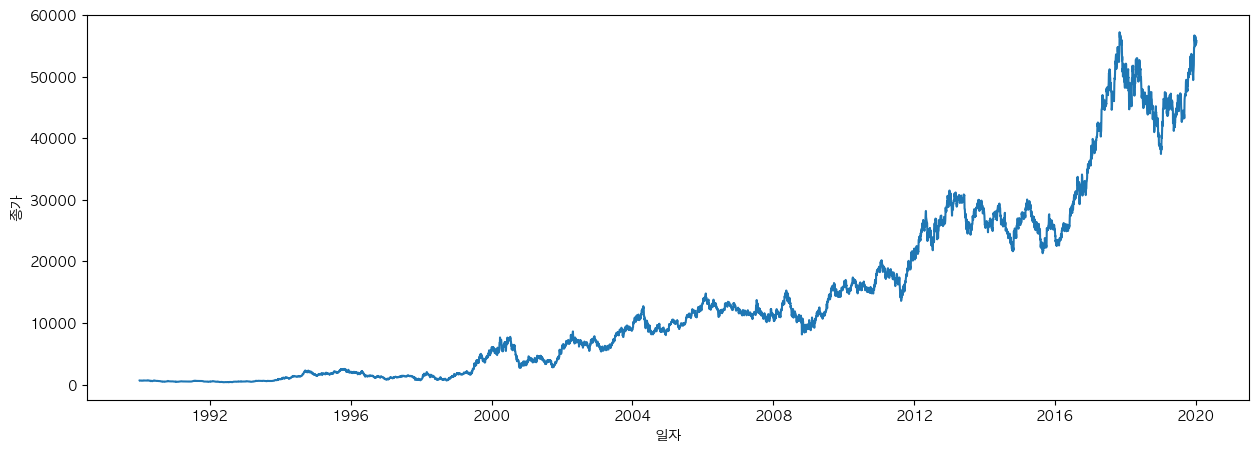

In [32]:
# 일자별 종가 기준
plt.figure(figsize=(15,5))
sns.lineplot(
    x=df.일자,
    y=df.종가
)
plt.show()

In [33]:
# 현재 내림차순으로 되어 있는 df오름차순으로 정렬
df = df.sort_values('일자').reset_index(drop=True)
df.head()

일자   시가   고가   저가   종가      거래량    연도  월  일
0 1990-01-03  673  689  661  685  1715032  1990  1  3
1 1990-01-04  689  701  685  693  2738562  1990  1  4
2 1990-01-05  689  693  678  678  1790849  1990  1  5
3 1990-01-06  685  689  681  681  1724183  1990  1  6
4 1990-01-08  681  687  673  673   966666  1990  1  8

In [34]:
# 일자와 관련된 컬럼을 제외하고 data의 크기 비교
columns = ['시가','고가','저가','종가','거래량']
df[columns].describe()

시가            고가            저가            종가           거래량
count   7828.000000   7828.000000   7828.000000   7828.000000  7.828000e+03
mean   13102.048927  13243.941620  12957.559658  13101.641415  1.908968e+07
std    14157.419071  14285.315014  14022.456207  14155.504533  1.722374e+07
min      390.000000    396.000000    387.000000    393.000000  0.000000e+00
25%     1410.000000   1434.000000   1390.000000   1410.000000  8.008238e+06
50%     8865.000000   8960.000000   8745.000000   8860.000000  1.453765e+07
75%    21430.000000  21680.000000  21200.000000  21480.000000  2.546348e+07
max    57500.000000  57520.000000  56760.000000  57220.000000  3.266220e+08

> 거래량과 다른 컬럼의 수치 차이가 크므로 표준화 시도

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [36]:
dfScaled = scaler.fit_transform(df[columns])
dfScaled = pd.DataFrame(dfScaled)
dfScaled.columns = columns
dfScaled

시가        고가        저가        종가       거래량
0     0.004955  0.005129  0.004860  0.005138  0.005251
1     0.005236  0.005339  0.005286  0.005279  0.008384
2     0.005236  0.005199  0.005162  0.005015  0.005483
3     0.005165  0.005129  0.005215  0.005068  0.005279
4     0.005095  0.005094  0.005073  0.004927  0.002960
...        ...       ...       ...       ...       ...
7823  0.977237  0.983895  0.981197  0.975012  0.025585
7824  0.964980  0.973391  0.968779  0.964454  0.039781
7825  0.973735  0.983895  0.967005  0.969733  0.047217
7826  0.954474  0.966389  0.961684  0.969733  0.031470
7827  0.968482  0.980394  0.979423  0.975012  0.030291

[7828 rows x 5 columns]

---
### feature와 target 만들기

In [41]:
featureNames = ['시가','고가','저가','거래량']
targetName = ['종가']

In [42]:
feature = dfScaled[featureNames]
target = dfScaled[targetName]

In [40]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7828 entries, 0 to 7827
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시가      7828 non-null   float64
 1   고가      7828 non-null   float64
 2   저가      7828 non-null   float64
 3   거래량     7828 non-null   float64
dtypes: float64(4)
memory usage: 244.8 KB


In [43]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7828 entries, 0 to 7827
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종가      7828 non-null   float64
dtypes: float64(1)
memory usage: 61.3 KB


---
### train, test, valid 만들기

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# train과 test 만들기
trainData, testData, trainTarget, testTarget = train_test_split(feature, target, test_size=0.2)

In [46]:
print(trainData.shape)
print(testData.shape)
print(trainTarget.shape)
print(testTarget.shape)

(6262, 4)
(1566, 4)
(6262, 1)
(1566, 1)


In [47]:
# train과 valid 만들기
x_train, x_valid, y_train, y_valid = train_test_split(trainData, trainTarget, test_size=0.2)

In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(5009, 4)
(5009, 1)
(1253, 4)
(1253, 1)


In [49]:
# RandomForest로 모델 구현
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

In [74]:
rf = RandomForestRegressor(
    n_jobs=-1, # -1: pc 자원을 다씀, 1: 다쓰지 않음
    random_state=42
)

scores = cross_validate(rf, x_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/Users/jyh/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jyh/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jyh/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jyh/miniforge3/envs/tensorflow/lib/python3.9/site-pack

0.99998147765227 0.9998699745312628
